In [2]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
warnings.filterwarnings('ignore')

In [2]:
path="./data/feb_18_data/internal_structure/cylinder_2/"
folder_list = os.listdir(path)

In [3]:
folder_list

['p13',
 'p7',
 'p3',
 'p6',
 'p17',
 'p1',
 'p15',
 'p18',
 'p2',
 'p10',
 'p16',
 'p19',
 'p4',
 'p14',
 'p5',
 'p12',
 'p11',
 'p8',
 'p9']

Import dataset

In [35]:
file_size=10
def get_data(raw_data):
  data=raw_data.drop(["msg","time(second)"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishalu
finishwoo
finishbra
finishprinted_pla
finishpla
finishbra_hollow_thin
finishalu_hollow_thick
finishprinted_resin
finishalu_hollow_thin


In [3]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [64]:
path="./data/feb_18_data/training_100_each_label/internal_structure/cylinder_2/"
folder_list = os.listdir(path)

In [120]:
df_all=pd.DataFrame()
start=15
end=20
labellist=['p'+str(i) for i in range(start,end)]

for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if label=="":
    continue
  df_temp.loc['label']=[(labellist.index(label)+start-1)*10 for _ in list(df_temp)]
  print(label,name)
  df_all = pd.concat([df_all, df_temp], axis=1)


p17 p17
p15 p15
p18 p18
p16 p16
p19 p19


In [121]:
df_all2=pd.DataFrame()
path_2="./data/feb_18_data/test_25_each_label/internal_structure/cylinder_2/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if(name!="p1"):continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if label=="":
    continue
  print(label,name)
  df_temp.loc['label']=[(labellist.index(label)+start-1)*10 for _ in list(df_temp)]
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

p17 p17
p15 p15
p18 p18
p16 p16
p19 p19


In [122]:
df_all=df_all.dropna(axis=0)
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)

df_all2=df_all2.dropna(axis=0)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)

In [123]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [124]:
df_all=fft_self(df_all)
df_all2=fft_self(df_all2)

In [125]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,20210.000000,20454.000000,17572.000000,19097.000000,21971.000000,23234.000000,21414.000000,17931.000000,18386.000000,20936.000000,...,22783.000000,21405.000000,22622.000000,18302.000000,22164.000000,22207.000000,17111.000000,21855.000000,19161.000000,18964.000000
1,5639.433372,2400.808758,2202.296397,2667.149678,1787.206160,9662.346414,1957.496701,4223.744324,2598.628750,1900.528368,...,8670.486532,2375.370282,1527.436080,1632.695565,1199.215636,4682.931762,513.360831,512.146585,2195.672064,2831.041033
2,11059.146668,321.151348,517.692712,2637.141024,3117.699190,9714.453708,1316.305672,1983.307260,1627.965379,4367.451817,...,10419.229912,879.932397,1345.913688,3285.958826,3203.693004,8986.918408,3246.583017,684.345374,2115.375557,903.231602
3,10079.864768,2089.067200,1795.881273,2729.300817,1778.255727,13336.608517,3785.815071,4844.564359,1396.136777,3641.167619,...,15007.142663,3363.332202,2598.643385,3732.426871,3090.068059,8951.699468,1968.245877,1538.743921,1562.697428,2649.392946
4,12972.616866,2966.140571,3077.301437,533.427235,2901.344652,16143.006830,4446.302880,3233.277255,3368.570904,2143.130998,...,14295.099597,1198.243712,3062.423267,2816.499750,969.139873,14284.281741,2516.909415,4052.389884,2958.892728,2362.237423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,12972.616866,2966.140571,3077.301437,533.427235,2901.344652,16143.006830,4446.302880,3233.277255,3368.570904,2143.130998,...,14295.099597,1198.243712,3062.423267,2816.499750,969.139873,14284.281741,2516.909415,4052.389884,2958.892728,2362.237423
41997,10079.864768,2089.067200,1795.881273,2729.300817,1778.255727,13336.608517,3785.815071,4844.564359,1396.136777,3641.167619,...,15007.142663,3363.332202,2598.643385,3732.426871,3090.068059,8951.699468,1968.245877,1538.743921,1562.697428,2649.392946
41998,11059.146668,321.151348,517.692712,2637.141024,3117.699190,9714.453708,1316.305672,1983.307260,1627.965379,4367.451817,...,10419.229912,879.932397,1345.913688,3285.958826,3203.693004,8986.918408,3246.583017,684.345374,2115.375557,903.231602
41999,5639.433372,2400.808758,2202.296397,2667.149678,1787.206160,9662.346414,1957.496701,4223.744324,2598.628750,1900.528368,...,8670.486532,2375.370282,1527.436080,1632.695565,1199.215636,4682.931762,513.360831,512.146585,2195.672064,2831.041033


In [126]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,18699.000000,24369.000000,21630.000000,12654.000000,17250.000000,10870.000000,40182.000000,19784.000000,37538.000000,10701.000000,...,12929.000000,19858.000000,18824.000000,19481.000000,22288.000000,11983.000000,18261.000000,20015.000000,23281.000000,20458.000000
1,4516.945118,4558.745643,513.503566,8240.290827,5173.519892,2570.087344,19282.327907,3182.527346,26031.074746,11770.297607,...,3006.821481,1680.053041,3296.475050,1163.529248,1542.940786,4067.606145,4427.145212,2680.368675,1409.916685,2118.310283
2,8596.057369,5479.967041,1688.790684,7886.246701,3935.799486,4480.648679,18735.457648,1425.915561,11829.460680,12955.400132,...,2703.875041,3163.507734,1199.724183,395.218123,1378.027245,5960.570123,4844.668445,488.778775,3342.521792,3181.644122
3,8244.009179,6515.917782,2331.254845,10296.217510,4299.226056,6635.716671,19133.348771,3264.693601,35002.257409,13321.074854,...,7480.562165,1533.614321,3354.722987,4659.592948,1377.912152,8312.670525,4637.764528,783.988608,1750.798382,1811.138861
4,7571.574499,9031.137647,7353.458391,10508.975896,7940.575520,11189.795669,23634.391795,4760.230489,65860.379134,12151.340807,...,11015.431964,2094.703969,1158.641687,1758.704343,1386.688202,12144.889534,6333.761775,1791.537672,416.980665,782.245405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,7571.574499,9031.137647,7353.458391,10508.975896,7940.575520,11189.795669,23634.391795,4760.230489,65860.379134,12151.340807,...,11015.431964,2094.703969,1158.641687,1758.704343,1386.688202,12144.889534,6333.761775,1791.537672,416.980665,782.245405
41997,8244.009179,6515.917782,2331.254845,10296.217510,4299.226056,6635.716671,19133.348771,3264.693601,35002.257409,13321.074854,...,7480.562165,1533.614321,3354.722987,4659.592948,1377.912152,8312.670525,4637.764528,783.988608,1750.798382,1811.138861
41998,8596.057369,5479.967041,1688.790684,7886.246701,3935.799486,4480.648679,18735.457648,1425.915561,11829.460680,12955.400132,...,2703.875041,3163.507734,1199.724183,395.218123,1378.027245,5960.570123,4844.668445,488.778775,3342.521792,3181.644122
41999,4516.945118,4558.745643,513.503566,8240.290827,5173.519892,2570.087344,19282.327907,3182.527346,26031.074746,11770.297607,...,3006.821481,1680.053041,3296.475050,1163.529248,1542.940786,4067.606145,4427.145212,2680.368675,1409.916685,2118.310283


In [113]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score,root_mean_squared_error,mean_absolute_error

In [127]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"]
df2 = df_all2.T
X2=df2.drop("label",axis=1)
y2=df2["label"]
X.shape,y.shape,X2.shape,y2.shape

((500, 42000), (500,), (125, 42000), (125,))

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

# Create linear regression object
# regr =GradientBoostingRegressor(random_state=0)
regr = MLPRegressor((450,250,50),random_state=1, max_iter=2000)
# regr = svm.SVR()
kernel_pca = KernelPCA(kernel='cosine',n_components=809)
kpca=kernel_pca.fit(X_train)
X_train=kpca.transform(X_train)
X_test = kpca.transform(X_test)
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


print("RMSE",root_mean_squared_error(y_test,y_pred))


RMSE 0.15644165852927425


In [129]:
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 score",r2)

RMSE 0.15644165852927425
MAE 0.11854032688763766
R2 score 0.9998630902185982


In [130]:
X_test, y_test = X2,y2
X_test = kpca.transform(X_test)
y_pred=regr.predict(X_test)

print("RMSE",root_mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 score",r2)

RMSE 5.651333691962655
MAE 4.621798697632498
R2 score 0.8403121375104388


In [118]:
X_test.shape,y_test.shape,y_pred.shape

((125, 450), (125,), (125,))

In [25]:
import pickle 
pickle.dump(regr, open("regression_in_cylinser2_10_23_after_fft", 'wb')) 

In [45]:
my_model_clf = pickle.load(open("regression_in_cylinser2_10_23_after_fft", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)
y_pred = my_model_clf.predict(X_test)

Score:  0.9968496246624076


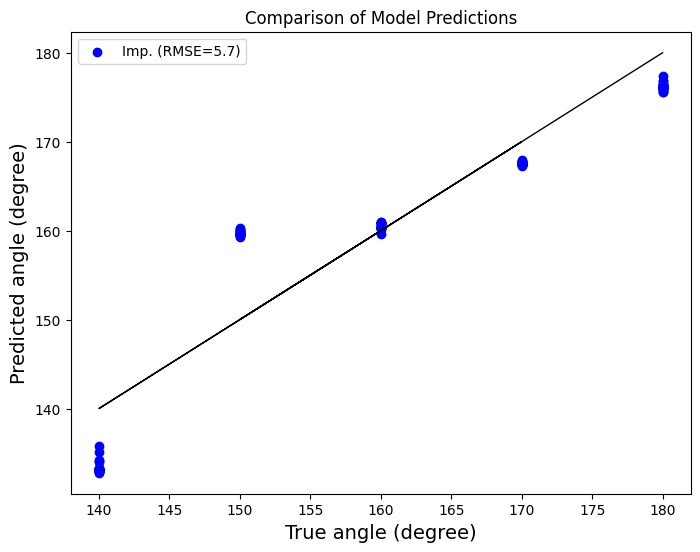

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label=f'Imp. (RMSE={root_mean_squared_error(y_test,y_pred):.1f})', color='blue', marker='o')


# Plot the line of perfect prediction
plt.plot(y_test, y_test, color='black', linestyle='-', linewidth=1)

# Labels and title
plt.xlabel('True angle (degree)', fontsize=14)
plt.ylabel('Predicted angle (degree)', fontsize=14)
plt.legend(loc='upper left')
plt.title('Comparison of Model Predictions')

# Display the plot
plt.show()

In [28]:
X.shape

(1900, 42000)

In [27]:
X_train.shape

(1710, 42000)

In [29]:
X_test.shape

(190, 42000)